# Seminari de computació científica

## Introducció
En aquest seminari introduirem i eines de computacio simbòlica i de computació numèrica, per il·lustrar com els coneixements adquirits durant l'assignatura es poden
extendre i complementar emprant eines compuacionals.

**Computació simbòlica**: La computació simbòlica o algebraica es dedica a l'estudi i desenvolupament d'algorismes i programari per a la manipulació d'expressions matemàtiques i altres objectes matemàtics. Font: [Wikipedia](https://ca.wikipedia.org/wiki/Computaci%C3%B3_algebraica). Els programaris que realitzen càlculs simbòlics s'anomenen sistemes algebraics computacionals.

**Càlcul numèric**: L'anàlisi numèrica o càlcul numèric és la branca de les matemàtiques que s'encarrega de l'estudi i disseny d'algorismes per obtenir solucions numèriques aproximades als problemes de matemàtica contínua. Font [Wikipedia](https://ca.wikipedia.org/wiki/An%C3%A0lisi_num%C3%A8rica).

La derivació automàtica és una variant de la derivació simbòlica i se sol considerar part del camp de computació simbòlica. Els algoritmes d'optimització numèrica són un dels elements més populars i estudiats del camp de la computació numèrica. Plegats, la derivació automàtica i l'optimització numèrica són la base de tots els sistemes de "machine learning" i "artificial intelligence" actuals.

En general, la resolució de problemes científics avui en dia requereix poc o molt part de computació científica, generalment combinant les dues branques anteriors.

Idea: introduir maxima/sympy i numpy+scipy.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root

## Exemple: sistema de ventilació d'un mercat municipal

Ens han encarregat la construcció i instal·lació del sistema de ventilació i filtratge d'aire del nou mercat municipal de Barcelona. Per llei, tot el volum d'aire a l'interior de l''edifici ha de ser renovat com a mínim cada hora.

### a) Resolució d'integrals unidimensionals numèricament
Els sistemes bomba+filtre que estem considerant bomben una quantitat que depèn del temps passat des de l'últim canvi de filtre i de la potència a la que estigui operant.

Si sabem que els filtres es canviaran 1 cop a la setmana, que el volum del mercat municipal és de 9 dm3 i que la bomba té 3 configuracions de potència (0, 1, i 2). Quantes bombes caldrà instal·lar?

$$
F_{processat}(t, p) = 3 e^{-\frac{t}{300}} (\frac{t}{240}+1)^{-3+p}; \qquad t>0
$$

Nota: temps en hores, flux en dm cubics/h.

In [2]:
def f(t, p):
    return 3*np.exp(-t / 300) * (t/240+1)**(-3+p)

In [3]:
t = np.linspace(1e-3, 24*7)

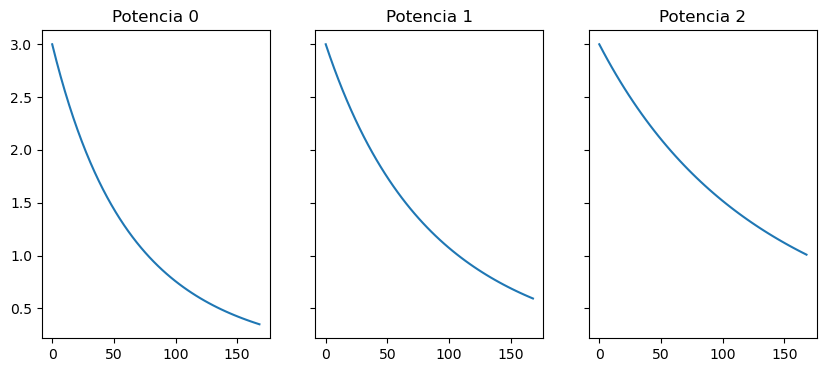

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True)
ax = axes[0]
ax.plot(t, f(t, 0))
ax.set_title("Potencia 0")

ax = axes[1]
ax.plot(t, f(t, 1))
ax.set_title("Potencia 1")

ax = axes[2]
ax.plot(t, f(t, 2))
ax.set_title("Potencia 2");

Com que les funcions són decreixents, ens interessa comprovar principalment que la integral del flux processat _durant la última hora de la setmana a potència 2_ és igual al volum a l'interior del mercat. Ho podeu comprovar amb Maxima, però la integral:

$$
\int_{167}^{168} 3 e^{-\frac{t}{300}} (\frac{t}{240}+1)^{-3+p} dt
$$

No té solució analítica.

**Càlcul del volum mitjançant càlcul numèric**

Hi ha diferents metòdes per aproximar una integral unidimensional numèricament, per minimitzar el nombre de conceptes nous, utilitzarem la suma de Riemann com a mètode d'integració numèrica:

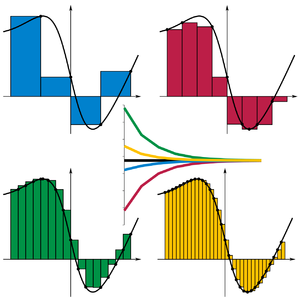

In [5]:
grid = np.linspace(24*7-1, 24*7, 100)
midpoints = (grid[:-1] + grid[1:])/2
width = grid[1]-grid[0]

processed_volume = np.sum(f(midpoints, 2))*width
9 / processed_volume

8.902623290454022

### b) Resolució d'equacions trascendents

Necessitem 9 sistemes bomba+filtre, però a quines hores hem de canviar de potència per consumir el mínim sense baixar mai per sota de la quantitat d'aire processat?

Hem de definir el volum processat com a funció del temps:

$$
V(T) = \int_T^{T+1} F_{processat}(t, p) dt
$$

I solucionar la següent equació:

\begin{align}
9V(T) - V_{mercat} &= 0 \\
9\int_T^{T+1} 3 e^{-\frac{t}{300}} (\frac{t}{240}+1)^{-3+p}dt - 9 &= 0
\end{align}

equació que només es pot solucionar numèricament.

**Cerca de les arrels d'una funció numèricament**
Una manera de trobar arrels d'una funció contínua és el mètode de la bisecció.

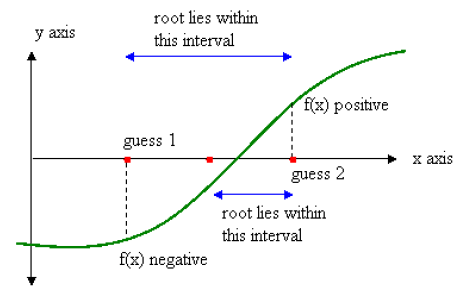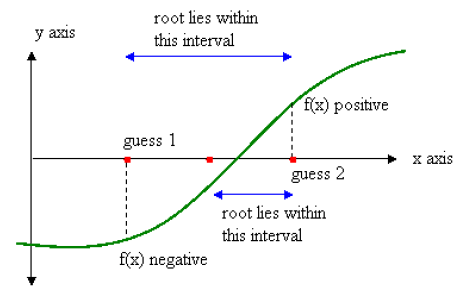

In [9]:
def V(T, p):
    grid = np.linspace(T, T+1, 100)
    midpoints = (grid[:-1] + grid[1:])/2
    width = grid[1]-grid[0]
    
    return np.sum(f(midpoints, p), axis=0)*width

def eq(T, p):
    return 9*V(T, p) - 9

In [15]:
from scipy.optimize import root_scalar

In [16]:
root_scalar(
    eq,                 # equation to be solved as python function
    bracket=(0, 24*7),  # interval containing the root
    method="bisect",
    args=(0,),          # extra arguments for function, here p
) # the root in the output is the solution

      converged: True
           flag: converged
 function_calls: 49
     iterations: 47
           root: 77.06026910325846

In [17]:
root_scalar(
     eq,                 # equation to be solved as python function
    bracket=(0, 24*7),  # interval containing the root
    method="bisect",
    args=(1,),          # extra arguments for function, here p
) # the root in the output is the solution

      converged: True
           flag: converged
 function_calls: 49
     iterations: 47
           root: 107.003477230128

### c) Optimització numèrica

La temperatura del sistema bomba+filtre depèn del flux que està processant en aquell moment i del temps que fa que està funcionant:

**Optimització numèrica**

Metode de newton

## Apendix: 
L'equip del projecte de nou mercat canvia, i també els seus plànols. El nou arquitecte del projecte però no ens ha pogut proporcionar el volum a l'interior de l'edifici, només la fórmula de la curva del sostre:

a)

$$
Z_1(x,y) = \cos^2(2 \pi y) (1-y^2) \textcolor{blue}{e^{-x^2}} + 1
$$

b)

$$
Z_2(x,y) = \cos^2(2 \pi y) (1-y^2) \textcolor{blue}{2e^{-\cosh(x)}} + 1
$$

en el sistema de referència que té com a origen el centre al terra del mercat, i les dimensions del mercat: 4 dm en l'eix x i 2 dm en l'eix y.

### Visualizació de la superfície

In [1]:
import numpy as np

def z1(x, y):
    return np.cos(y*2*np.pi)**2 * (1-y**2) * np.exp(-x**2) + 1

def z2(x, y):
    return np.cos(y*2*np.pi)**2 * (1-y**2) * 2*np.exp(-np.cosh(x)) + 1

In [2]:
x, y = np.linspace(-2, 2), np.linspace(-1, 1)

In [3]:
X, Y = np.meshgrid(x, y)
Z1 = z1(X, Y)
Z2 = z2(X, Y)

In [4]:
import matplotlib.pyplot as plt
#%matplotlib Qt

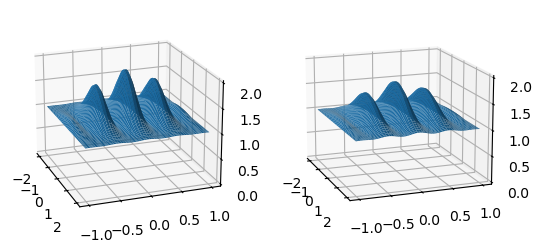

In [5]:
fig, axes = plt.subplots(1, 2, subplot_kw={"projection": "3d"})

ax = axes[0]
ax.view_init(elev=20, azim=-20)
ax.plot_surface(X, Y, Z1)
ax.set_zlim(bottom=0, top=2)

ax = axes[1]
ax.view_init(elev=15, azim=-20)
ax.plot_surface(X, Y, Z2)
ax.set_zlim(bottom=0, top=2);

### Càlcul del volum mitjançant computació simbòlica

In [6]:
from sympy import *
init_printing(use_unicode=False, wrap_line=False)

x = Symbol('x')
y = Symbol('y')

In [7]:
int_cupula_z1 = integrate(integrate(cos(y*2*pi)**2*(1-y**2)*exp(-x**2)+1, (y, -1, 1)), (x, -2, 2))
int_cupula_z1

In [8]:
volume_z1 = int_cupula_z1.evalf()
volume_z1

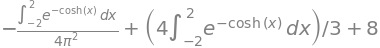

In [9]:
int_cupula_z2 = integrate(integrate(cos(y*2*pi)**2*(1-y**2)*2*exp(-cosh(x))+1, (y, -1, 1)), (x, -2, 2))
simplify(int_cupula_z2)

In [10]:
def int_1d(x):
    return np.exp(-np.cosh(x))

In [11]:
grid = np.linspace(-2, 2, 100)
midpoints = (grid[:-1] + grid[1:])/2
width = grid[1]-grid[0]

riemann_sum = np.sum(int_1d(midpoints))*width
volume_z2 = (-1/(4*np.pi**2) + 4/3) * riemann_sum + 8
volume_z2